In [2]:
import pandas as pd
from statsbombpy import sb
import numpy as np

In [3]:
events = sb.events(match_id=18236)

credentials were not supplied. open data access only


In [4]:
events.columns

Index(['bad_behaviour_card', 'ball_receipt_outcome', 'ball_recovery_offensive',
       'ball_recovery_recovery_failure', 'block_save_block',
       'carry_end_location', 'clearance_aerial_won', 'counterpress',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id',
       'index', 'interception_outcome', 'location', 'match_id', 'minute',
       'off_camera', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_backheel', 'pass_body_part', 'pass_cross', 'pass_end_location',
       'pass_goal_assist', 'pass_height', 'pass_length', 'pass_outcome',
       'pass_recipient', 'pass_shot_assist', 'pass_switch', 'pass_type',
       'period', 'play_pattern', 'pla

In [5]:
for g,v  in events.groupby("type")['type']:
    print(g)

Bad Behaviour
Ball Receipt*
Ball Recovery
Block
Carry
Clearance
Dispossessed
Dribble
Dribbled Past
Duel
Foul Committed
Foul Won
Goal Keeper
Half End
Half Start
Interception
Miscontrol
Offside
Pass
Pressure
Referee Ball-Drop
Shield
Shot
Starting XI
Substitution
Tactical Shift


In [6]:
events[events['type'] == "Pass"].pass_end_location

6       [60.0, 42.0]
7       [56.0, 39.0]
8       [87.0, 80.0]
9       [51.0, 16.0]
10      [50.0, 25.0]
            ...     
1223    [67.0, 76.0]
1224    [55.0, 77.0]
1225    [74.0, 79.0]
1226     [2.0, 24.0]
1227    [67.0, 34.0]
Name: pass_end_location, Length: 1222, dtype: object

In [7]:
events[events['type'] == "Pass"].location

6       [61.0, 41.0]
7       [60.0, 42.0]
8       [57.0, 41.0]
9        [35.0, 1.0]
10      [51.0, 16.0]
            ...     
1223    [57.0, 69.0]
1224    [67.0, 76.0]
1225    [55.0, 79.0]
1226      [5.0, 2.0]
1227    [14.0, 29.0]
Name: location, Length: 1222, dtype: object

In [8]:
barca_events = events[events['team'] == "Barcelona"]

In [9]:
barca_events.minute

0        0
3        0
5       45
9        0
10       0
        ..
4319    56
4322    85
4323    87
4324    91
4325    84
Name: minute, Length: 2757, dtype: int64

In [10]:
barca_events[barca_events["substitution_replacement"] == "Seydou Kéita"].minute.values

array([85])

In [11]:
subs_time = []
sub_player_ids = []
for i in barca_events.substitution_replacement.dropna():
    minutes = barca_events[barca_events["substitution_replacement"] == i].minute.values[0]
    sub_player_name = barca_events[barca_events["player"] == i].player.values[0]
    sub_player_id = barca_events[barca_events['player'] == sub_player_name].player_id.values[0]
    sub_player_ids.append(sub_player_id)
    subs_time.append(minutes)

In [12]:
sub_player_ids

[20169.0, 20125.0, 4891.0]

In [13]:
min_sub_time = min(subs_time)

In [239]:
player_names = []
player_id = []
for g, v in barca_events.groupby("player"):
    player_id.append(v['player_id'][:1].values[0])
    player_names.append(v['player'][:1].values[0])

In [241]:
player_names, player_id

(['Andrés Iniesta Luján',
  'Carles Puyol i Saforcada',
  'Daniel Alves da Silva',
  'David Villa Sánchez',
  'Eric-Sylvain Bilal Abidal',
  'Gerard Piqué Bernabéu',
  'Ibrahim Afellay',
  'Javier Alejandro Mascherano',
  'Lionel Andrés Messi Cuccittini',
  'Pedro Eliezer Rodríguez Ledesma',
  'Sergio Busquets i Burgos',
  'Seydou Kéita',
  'Víctor Valdés Arribas',
  'Xavier Hernández Creus'],
 [5216.0,
  20125.0,
  4324.0,
  12737.0,
  20177.0,
  5213.0,
  4891.0,
  5506.0,
  5503.0,
  3958.0,
  5203.0,
  20169.0,
  20176.0,
  20131.0])

In [242]:
start_ix_player_ids = []
start_ix_player_names = []
j = 0
for i in player_id:
    if i not in sub_player_ids:
        start_ix_player_ids.append(i)
        start_ix_player_names.append(player_names[j])
    j += 1
        
start_ix_player_ids

[5216.0,
 4324.0,
 12737.0,
 20177.0,
 5213.0,
 5506.0,
 5503.0,
 3958.0,
 5203.0,
 20176.0,
 20131.0]

In [243]:
start_ix_player_names

['Andrés Iniesta Luján',
 'Daniel Alves da Silva',
 'David Villa Sánchez',
 'Eric-Sylvain Bilal Abidal',
 'Gerard Piqué Bernabéu',
 'Javier Alejandro Mascherano',
 'Lionel Andrés Messi Cuccittini',
 'Pedro Eliezer Rodríguez Ledesma',
 'Sergio Busquets i Burgos',
 'Víctor Valdés Arribas',
 'Xavier Hernández Creus']

In [16]:
for pid in start_ix_player_ids:
    print(pid)

5216.0
4324.0
12737.0
20177.0
5213.0
5506.0
5503.0
3958.0
5203.0
20176.0
20131.0


In [17]:
barca_events[barca_events['player_id'] == 20125.0].player

1173    Carles Puyol i Saforcada
1182    Carles Puyol i Saforcada
1184    Carles Puyol i Saforcada
1206    Carles Puyol i Saforcada
1223    Carles Puyol i Saforcada
1225    Carles Puyol i Saforcada
2351    Carles Puyol i Saforcada
2353    Carles Puyol i Saforcada
2392    Carles Puyol i Saforcada
2394    Carles Puyol i Saforcada
3443    Carles Puyol i Saforcada
3444    Carles Puyol i Saforcada
3476    Carles Puyol i Saforcada
3478    Carles Puyol i Saforcada
4170    Carles Puyol i Saforcada
4269    Carles Puyol i Saforcada
Name: player, dtype: object

In [18]:
avg_loc_of_each_player_x = []
avg_loc_of_each_player_y = []

for playerId in start_ix_player_ids:
    each_player_events = barca_events[np.logical_and(barca_events['player_id'] == playerId, barca_events.minute < min_sub_time)]
    player_x, player_y = [], []
    i = 0
    for loc in each_player_events['location'].dropna().values:
        player_x.append(loc[0])
        player_y.append(loc[1])
    avg_x = sum(player_x) / len(player_x)
    avg_y = sum(player_y) / len(player_y)
    avg_loc_of_each_player_x.append(avg_x)
    avg_loc_of_each_player_y.append(avg_y)
        
        
        

In [19]:
each_player_events.columns

Index(['bad_behaviour_card', 'ball_receipt_outcome', 'ball_recovery_offensive',
       'ball_recovery_recovery_failure', 'block_save_block',
       'carry_end_location', 'clearance_aerial_won', 'counterpress',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id',
       'index', 'interception_outcome', 'location', 'match_id', 'minute',
       'off_camera', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_backheel', 'pass_body_part', 'pass_cross', 'pass_end_location',
       'pass_goal_assist', 'pass_height', 'pass_length', 'pass_outcome',
       'pass_recipient', 'pass_shot_assist', 'pass_switch', 'pass_type',
       'period', 'play_pattern', 'pla

In [20]:
messi_events = barca_events[barca_events['player_id'] == 5503.0]

In [21]:
messi_events.position

10          Right Wing
61      Center Forward
63      Center Forward
65      Center Forward
68      Center Forward
             ...      
4258    Center Forward
4262    Center Forward
4264    Center Forward
4270    Center Forward
4271    Center Forward
Name: position, Length: 413, dtype: object

In [22]:
messi_events.location

10      [51.0, 16.0]
61      [57.0, 55.0]
63      [61.0, 70.0]
65      [70.0, 75.0]
68      [77.0, 76.0]
            ...     
4258    [75.0, 26.0]
4262    [59.0, 31.0]
4264    [63.0, 29.0]
4270    [66.0, 39.0]
4271    [84.0, 39.0]
Name: location, Length: 413, dtype: object

messi_events

In [23]:
messi_events.columns

Index(['bad_behaviour_card', 'ball_receipt_outcome', 'ball_recovery_offensive',
       'ball_recovery_recovery_failure', 'block_save_block',
       'carry_end_location', 'clearance_aerial_won', 'counterpress',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id',
       'index', 'interception_outcome', 'location', 'match_id', 'minute',
       'off_camera', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_backheel', 'pass_body_part', 'pass_cross', 'pass_end_location',
       'pass_goal_assist', 'pass_height', 'pass_length', 'pass_outcome',
       'pass_recipient', 'pass_shot_assist', 'pass_switch', 'pass_type',
       'period', 'play_pattern', 'pla

In [24]:
messi_events[messi_events['type'] == 'Pass']

,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_save_block,carry_end_location,clearance_aerial_won,counterpress,dribble_outcome,dribble_overrun,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:00:20.918,Pass,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:04:01.933,Pass,NaN
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:04:04.323,Pass,NaN
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:04:06.364,Pass,NaN
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:04:16.678,Pass,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:35:29.391,Pass,NaN
1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:35:34.627,Pass,NaN
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:37:48.992,Pass,NaN
1176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:44:58.790,Pass,True


In [25]:
player_id

[5216.0,
 20125.0,
 4324.0,
 12737.0,
 20177.0,
 5213.0,
 4891.0,
 5506.0,
 5503.0,
 3958.0,
 5203.0,
 20169.0,
 20176.0,
 20131.0]

In [26]:
barca_each_player_events = barca_events[barca_events['player_id'] == 12737.0 ]
barca_each_player_events[['player', 'position']]

,player,position
147,David Villa Sánchez,Right Wing
159,David Villa Sánchez,Right Wing
215,David Villa Sánchez,Right Wing
237,David Villa Sánchez,Right Wing
238,David Villa Sánchez,Right Wing
...,...,...
4192,David Villa Sánchez,Right Wing
4232,David Villa Sánchez,Right Wing
4265,David Villa Sánchez,Right Wing
4292,David Villa Sánchez,Right Wing


In [27]:
messi_x, messi_y = [], []
i = 0
for loc in messi_events['location'].dropna().values:
    messi_x.append(loc[0])
    messi_y.append(loc[1])

In [28]:
import matplotlib.pyplot as plt

In [29]:
min(messi_x)

35.0

In [30]:
sum(messi_x)/len(messi_x), sum(messi_y)/len(messi_y)

(78.97578692493947, 44.43341404358353)

In [31]:
events.columns

Index(['bad_behaviour_card', 'ball_receipt_outcome', 'ball_recovery_offensive',
       'ball_recovery_recovery_failure', 'block_save_block',
       'carry_end_location', 'clearance_aerial_won', 'counterpress',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id',
       'index', 'interception_outcome', 'location', 'match_id', 'minute',
       'off_camera', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_backheel', 'pass_body_part', 'pass_cross', 'pass_end_location',
       'pass_goal_assist', 'pass_height', 'pass_length', 'pass_outcome',
       'pass_recipient', 'pass_shot_assist', 'pass_switch', 'pass_type',
       'period', 'play_pattern', 'pla

In [244]:
start_ix_player_names

['Andrés Iniesta Luján',
 'Daniel Alves da Silva',
 'David Villa Sánchez',
 'Eric-Sylvain Bilal Abidal',
 'Gerard Piqué Bernabéu',
 'Javier Alejandro Mascherano',
 'Lionel Andrés Messi Cuccittini',
 'Pedro Eliezer Rodríguez Ledesma',
 'Sergio Busquets i Burgos',
 'Víctor Valdés Arribas',
 'Xavier Hernández Creus']

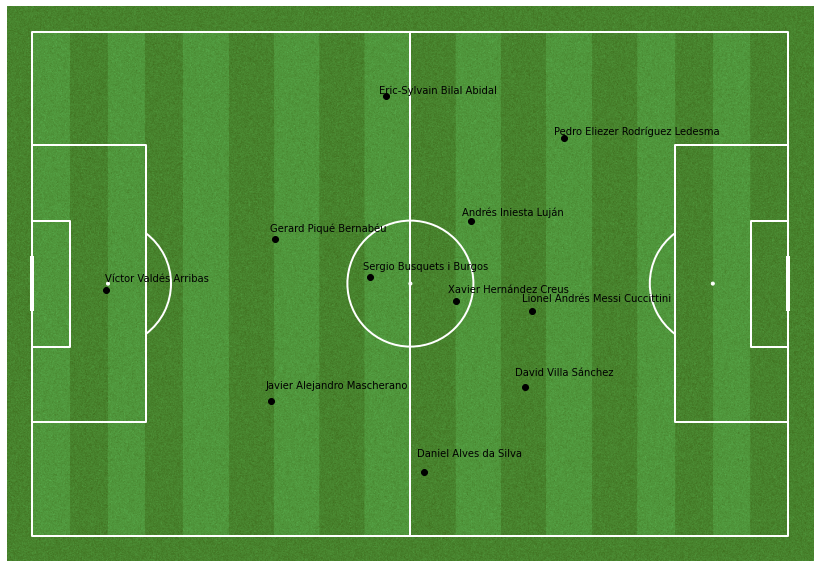

In [257]:
pitch.draw(figsize=(13.5, 8))
plt.scatter(avg_loc_of_each_player_x, avg_loc_of_each_player_y, color='black')
for i in range(len(start_ix_player_names)): 
    plt.text(avg_loc_of_each_player_x[i] * (1-0.02), avg_loc_of_each_player_y[i]*(1-0.034), start_ix_player_names[i])
plt.show()

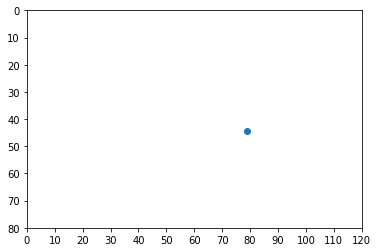

In [68]:
plt.scatter(sum(messi_x)/len(messi_x), sum(messi_y)/len(messi_y))
plt.xticks(list(range(0, 130, 10)))
plt.yticks(list(range(0, 90, 10)))
ax = plt.gca()
ax.invert_yaxis()
plt.show()

In [34]:
barca_events.columns

Index(['bad_behaviour_card', 'ball_receipt_outcome', 'ball_recovery_offensive',
       'ball_recovery_recovery_failure', 'block_save_block',
       'carry_end_location', 'clearance_aerial_won', 'counterpress',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id',
       'index', 'interception_outcome', 'location', 'match_id', 'minute',
       'off_camera', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_backheel', 'pass_body_part', 'pass_cross', 'pass_end_location',
       'pass_goal_assist', 'pass_height', 'pass_length', 'pass_outcome',
       'pass_recipient', 'pass_shot_assist', 'pass_switch', 'pass_type',
       'period', 'play_pattern', 'pla

In [35]:
for g,v in barca_events.groupby('type'):
    print(g)

Bad Behaviour
Ball Receipt*
Ball Recovery
Block
Carry
Clearance
Dispossessed
Dribble
Dribbled Past
Duel
Foul Committed
Foul Won
Goal Keeper
Half End
Half Start
Interception
Miscontrol
Offside
Pass
Pressure
Referee Ball-Drop
Shield
Shot
Starting XI
Substitution
Tactical Shift


In [37]:
barca_passes = barca_events[barca_events['type'] == "Pass"]
barca_passes[['player', 'location', 'pass_end_location', 'pass_outcome', 'pass_recipient', 'pass_type']]

,player,location,pass_end_location,pass_outcome,pass_recipient,pass_type
9,Eric-Sylvain Bilal Abidal,"[35.0, 1.0]","[51.0, 16.0]",NaN,Lionel Andrés Messi Cuccittini,Throw-in
10,Lionel Andrés Messi Cuccittini,"[51.0, 16.0]","[50.0, 25.0]",NaN,Sergio Busquets i Burgos,NaN
11,Sergio Busquets i Burgos,"[53.0, 28.0]","[55.0, 65.0]",NaN,Daniel Alves da Silva,NaN
17,Víctor Valdés Arribas,"[8.0, 40.0]","[6.0, 70.0]",NaN,Javier Alejandro Mascherano,NaN
18,Javier Alejandro Mascherano,"[21.0, 65.0]","[6.0, 48.0]",NaN,Víctor Valdés Arribas,NaN
...,...,...,...,...,...,...
1221,Xavier Hernández Creus,"[68.0, 48.0]","[65.0, 45.0]",NaN,Andrés Iniesta Luján,NaN
1222,Andrés Iniesta Luján,"[64.0, 45.0]","[57.0, 69.0]",NaN,Carles Puyol i Saforcada,NaN
1223,Carles Puyol i Saforcada,"[57.0, 69.0]","[67.0, 76.0]",NaN,Ibrahim Afellay,NaN
1224,Ibrahim Afellay,"[67.0, 76.0]","[55.0, 77.0]",NaN,Carles Puyol i Saforcada,NaN


In [38]:
for g, v in barca_passes.groupby('pass_outcome'):
    print(g)

Incomplete
Injury Clearance
Out
Unknown


In [43]:
barca_passes.pass_outcome.fillna(1, inplace=True)

/Users/amanjain/Library/Python/3.9/lib/python/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [46]:
barca_succesful_passes = barca_passes[barca_passes.pass_outcome == 1]

In [49]:
succesfull_passes_percent = len(barca_succesful_passes) / len(barca_passes) * 100

In [55]:
succesfull_passes_percent = str(round(succesfull_passes_percent, 2)) + "%"
succesfull_passes_percent

'88.39%'

In [58]:
barca_succesful_passes[['player_id','player', 'location', 'pass_end_location', 'pass_outcome', 'pass_recipient', 'pass_type']]

,player_id,player,location,pass_end_location,pass_outcome,pass_recipient,pass_type
9,20177.0,Eric-Sylvain Bilal Abidal,"[35.0, 1.0]","[51.0, 16.0]",1,Lionel Andrés Messi Cuccittini,Throw-in
10,5503.0,Lionel Andrés Messi Cuccittini,"[51.0, 16.0]","[50.0, 25.0]",1,Sergio Busquets i Burgos,NaN
11,5203.0,Sergio Busquets i Burgos,"[53.0, 28.0]","[55.0, 65.0]",1,Daniel Alves da Silva,NaN
17,20176.0,Víctor Valdés Arribas,"[8.0, 40.0]","[6.0, 70.0]",1,Javier Alejandro Mascherano,NaN
18,5506.0,Javier Alejandro Mascherano,"[21.0, 65.0]","[6.0, 48.0]",1,Víctor Valdés Arribas,NaN
...,...,...,...,...,...,...,...
1220,5216.0,Andrés Iniesta Luján,"[64.0, 41.0]","[68.0, 48.0]",1,Xavier Hernández Creus,NaN
1221,20131.0,Xavier Hernández Creus,"[68.0, 48.0]","[65.0, 45.0]",1,Andrés Iniesta Luján,NaN
1222,5216.0,Andrés Iniesta Luján,"[64.0, 45.0]","[57.0, 69.0]",1,Carles Puyol i Saforcada,NaN
1223,20125.0,Carles Puyol i Saforcada,"[57.0, 69.0]","[67.0, 76.0]",1,Ibrahim Afellay,NaN


In [59]:
barca_succesful_passes_before_substitution = barca_succesful_passes[barca_succesful_passes.minute < min_sub_time]

In [61]:
barca_succesful_passes_before_substitution[['player_id','player', 'location', 'pass_end_location', 'pass_outcome', 'pass_recipient', 'pass_type']]

,player_id,player,location,pass_end_location,pass_outcome,pass_recipient,pass_type
9,20177.0,Eric-Sylvain Bilal Abidal,"[35.0, 1.0]","[51.0, 16.0]",1,Lionel Andrés Messi Cuccittini,Throw-in
10,5503.0,Lionel Andrés Messi Cuccittini,"[51.0, 16.0]","[50.0, 25.0]",1,Sergio Busquets i Burgos,NaN
11,5203.0,Sergio Busquets i Burgos,"[53.0, 28.0]","[55.0, 65.0]",1,Daniel Alves da Silva,NaN
17,20176.0,Víctor Valdés Arribas,"[8.0, 40.0]","[6.0, 70.0]",1,Javier Alejandro Mascherano,NaN
18,5506.0,Javier Alejandro Mascherano,"[21.0, 65.0]","[6.0, 48.0]",1,Víctor Valdés Arribas,NaN
...,...,...,...,...,...,...,...
1117,20131.0,Xavier Hernández Creus,"[52.0, 65.0]","[42.0, 44.0]",1,Gerard Piqué Bernabéu,NaN
1118,5213.0,Gerard Piqué Bernabéu,"[55.0, 36.0]","[75.0, 49.0]",1,Xavier Hernández Creus,NaN
1119,20131.0,Xavier Hernández Creus,"[80.0, 56.0]","[75.0, 71.0]",1,Daniel Alves da Silva,NaN
1120,4324.0,Daniel Alves da Silva,"[76.0, 71.0]","[78.0, 63.0]",1,Xavier Hernández Creus,NaN


In [62]:
barca_succesful_passes_before_substitution

,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_save_block,carry_end_location,clearance_aerial_won,counterpress,dribble_outcome,dribble_overrun,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:00:18.726,Pass,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:00:20.918,Pass,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:00:22.509,Pass,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:00:55.146,Pass,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:01:02.692,Pass,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:39:00.727,Pass,NaN
1118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:39:05.953,Pass,NaN
1119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:39:10.519,Pass,True
1120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:39:12.548,Pass,NaN


In [71]:
messi_successful_passes = barca_succesful_passes[barca_succesful_passes['player_id'] == 5503]

In [74]:
messi_successful_passes[['location', 'pass_end_location', 'pass_recipient']]

,location,pass_end_location,pass_recipient
10,"[51.0, 16.0]","[50.0, 25.0]",Sergio Busquets i Burgos
61,"[57.0, 55.0]","[64.0, 73.0]",Daniel Alves da Silva
63,"[61.0, 70.0]","[65.0, 78.0]",Daniel Alves da Silva
65,"[70.0, 75.0]","[68.0, 71.0]",Daniel Alves da Silva
68,"[77.0, 76.0]","[69.0, 78.0]",Daniel Alves da Silva
...,...,...,...
1060,"[71.0, 56.0]","[75.0, 51.0]",Xavier Hernández Creus
1063,"[58.0, 45.0]","[58.0, 26.0]",Gerard Piqué Bernabéu
1095,"[72.0, 50.0]","[56.0, 63.0]",Javier Alejandro Mascherano
1176,"[63.0, 44.0]","[59.0, 27.0]",Seydou Kéita


In [118]:
# messi start loc
loc_x = []
loc_y = []

for x in messi_successful_passes.location:
    loc_x.append(x[0])
    loc_y.append(x[1])

In [119]:
# pass end loc
end_loc_x = []
end_loc_y = []

for x in messi_successful_passes.pass_end_location:
    end_loc_x.append(x[0])
    end_loc_y.append(x[1])

In [120]:
messi_successful_passes.pass_end_x = end_loc_x
messi_successful_passes.pass_end_y = end_loc_y

In [121]:
messi_successful_passes.loc_x = loc_x
messi_successful_passes.loc_y = loc_y

In [123]:
loc_x[i] /= 10
loc_y[i] /= 10
end_loc_x[i] /= 10
end_loc_y[i] /= 10

In [116]:
end_loc_y

[2.5,
 7.3,
 7.8,
 7.1,
 7.8,
 7.4,
 7.0,
 4.5,
 1.8,
 1.9,
 2.4,
 2.3,
 1.8,
 2.9,
 5.3,
 3.4,
 0.4,
 2.4,
 3.5,
 5.6,
 0.8,
 4.1,
 4.7,
 4.5,
 6.0,
 1.6,
 5.9,
 2.6,
 2.2,
 2.0,
 4.3,
 5.9,
 7.3,
 3.7,
 4.6,
 5.4,
 5.4,
 3.3,
 3.2,
 2.2,
 3.4,
 2.3,
 3.7,
 3.5,
 5.1,
 5.4,
 4.1,
 2.4,
 4.1,
 0.5,
 5.6,
 4.0,
 4.6,
 7.5,
 6.8,
 4.5,
 2.4,
 7.1,
 6.5,
 5.4,
 5.9,
 4.4,
 7.5,
 4.6,
 2.9,
 2.9,
 4.1,
 3.5,
 2.7,
 3.7,
 5.3,
 3.1,
 4.8,
 4.8,
 5.8,
 7.3,
 4.0,
 3.9,
 4.4,
 3.3,
 5.1,
 7.8,
 7.2,
 4.0,
 5.5,
 7.3,
 4.3,
 4.0,
 3.6,
 4.4,
 6.0,
 3.8,
 5.1,
 2.6,
 6.3,
 2.7,
 5.9]

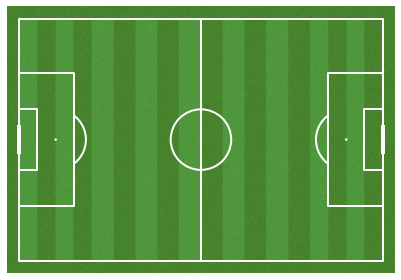

In [126]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw()
plt.show()

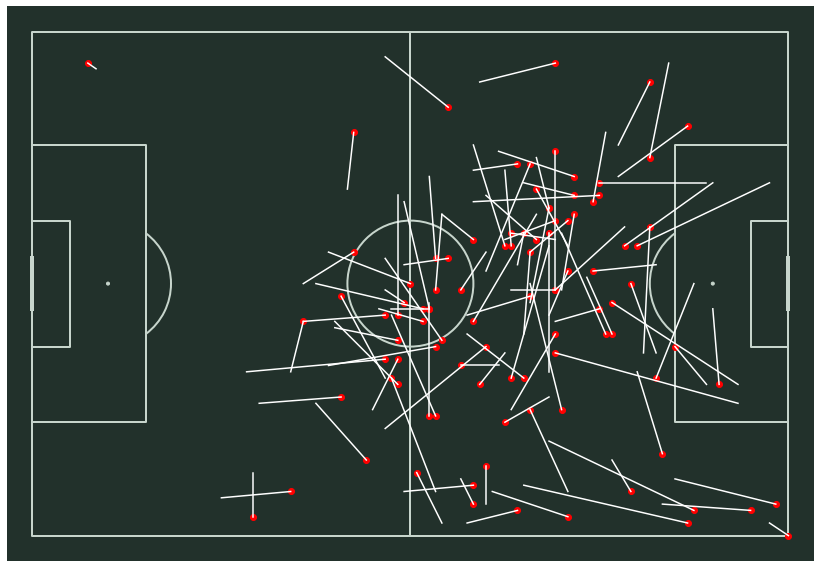

In [706]:
# fig, ax = plt.subplots(figsize=(13.5, 8))
fig, ax = pitch.draw(figsize=(13.5, 8))

# plt.gca().invert_yaxis()
for i in range(len(loc_x)):
    
    plt.plot((loc_x[i], end_loc_x[i]), (loc_y[i], end_loc_y[i]), color='white')
    pitch.scatter(loc_x[i], loc_y[i], color='red', ax=ax)

plt.show()

In [199]:
barca_events[barca_events.shot_outcome == "Goal"][['location', 'shot_end_location', 'player']]

,location,shot_end_location,player
4177,"[105.0, 47.0]","[120.0, 43.0, 0.2]",Pedro Eliezer Rodríguez Ledesma
4187,"[94.0, 43.0]","[120.0, 42.4, 0.6]",Lionel Andrés Messi Cuccittini
4192,"[100.0, 45.0]","[120.0, 43.4, 2.0]",David Villa Sánchez


In [ ]:
# filter out the passes by incomplete, out, etc.
# avg pass end location for each 11 players

In [157]:
messi_successful_passes.columns

Index(['bad_behaviour_card', 'ball_receipt_outcome', 'ball_recovery_offensive',
       'ball_recovery_recovery_failure', 'block_save_block',
       'carry_end_location', 'clearance_aerial_won', 'counterpress',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id',
       'index', 'interception_outcome', 'location', 'match_id', 'minute',
       'off_camera', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_backheel', 'pass_body_part', 'pass_cross', 'pass_end_location',
       'pass_goal_assist', 'pass_height', 'pass_length', 'pass_outcome',
       'pass_recipient', 'pass_shot_assist', 'pass_switch', 'pass_type',
       'period', 'play_pattern', 'pla

In [162]:
messi_longest_pass = messi_successful_passes[messi_successful_passes.pass_length == max(messi_successful_passes.pass_length)]

In [172]:
messi_longest_pass.location.values[0][1]

51.0

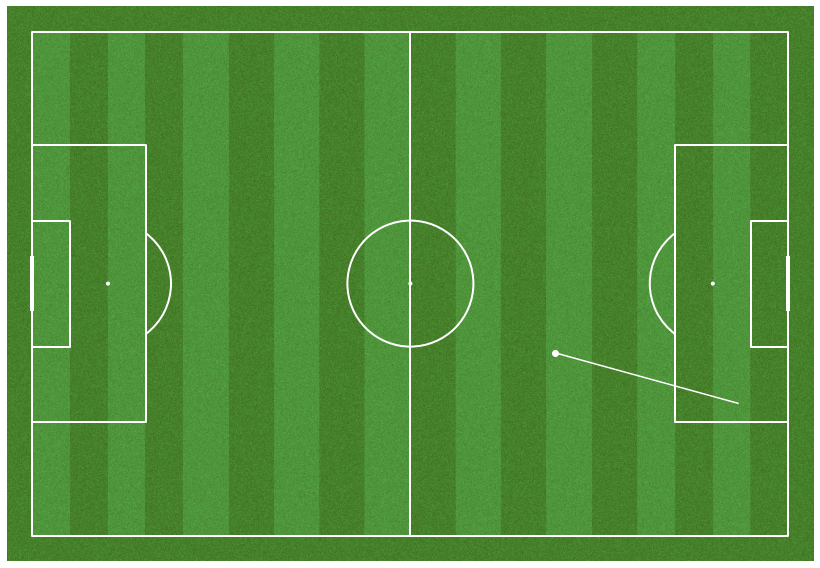

In [177]:
pitch.draw(figsize=(13.5, 8))
plt.plot((messi_longest_pass['location'].values[0][0], messi_longest_pass['pass_end_location'].values[0][0]), (messi_longest_pass['location'].values[0][1], messi_longest_pass['pass_end_location'].values[0][1]), color='white')
plt.scatter(messi_longest_pass.location.values[0][0], messi_longest_pass.location.values[0][1], color='white')

In [181]:
barca_events[np.logical_and(barca_events.minute > messi_longest_pass.minute.values[0], barca_events.second > messi_longest_pass.second.values[0])]






,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_save_block,carry_end_location,clearance_aerial_won,counterpress,dribble_outcome,dribble_overrun,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:22:59.840,Pass,NaN
537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:35:59.334,Pass,NaN
563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:37:59.096,Pass,NaN
674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:03:58.092,Pass,NaN
696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:05:59.425,Pass,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:07:59.120,Pass,NaN
758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:10:58.036,Pass,NaN
816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:17:58.330,Pass,NaN
837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:18:59.858,Pass,NaN
860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:19:58.638,Pass,NaN


In [200]:
# BARCA GOALS PLOT
goals = barca_events[barca_events['shot_outcome'] == 'Goal']

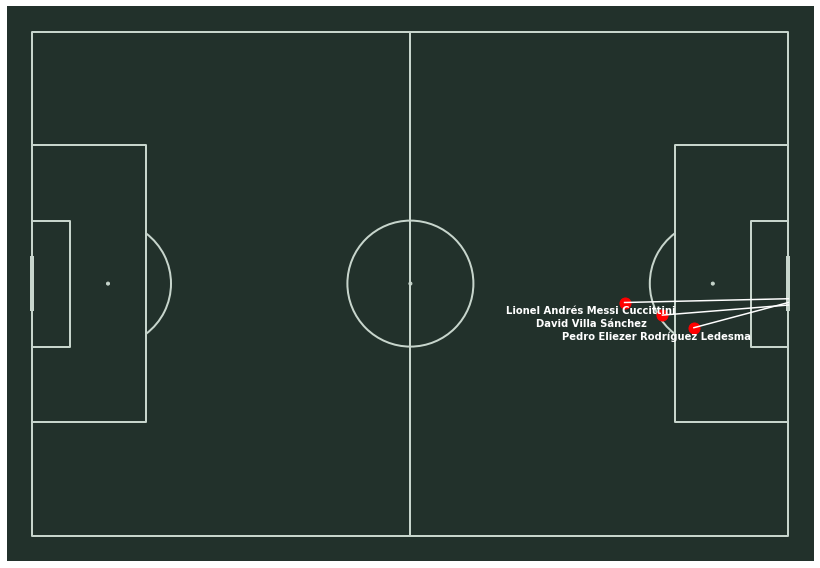

In [716]:
pitch.draw(figsize=(12, 8))
for i in range(len(goals)):
    plt.plot((goals.location.values[i][0], goals.shot_end_location.values[i][0]), (goals.location.values[i][1], goals.shot_end_location.values[i][1]), color='white')
    plt.scatter(goals.location.values[i][0], goals.location.values[i][1], color='red', s=122)
    plt.text(goals.location.values[i][0]*(1 - 0.2), goals.location.values[i][1]*(1 + 0.04), goals.player.values[i], color='white', weight='bold')
    
    

In [262]:
messi_successful_passes.index

Int64Index([  10,   61,   63,   65,   68,  127,  129,  131,  134,  154,  160,
             162,  165,  185,  195,  206,  221,  228,  230,  236,  272,  275,
             283,  286,  288,  294,  302,  311,  330,  332,  334,  354,  364,
             374,  416,  436,  438,  444,  454,  461,  463,  489,  496,  512,
             539,  559,  561,  592,  597,  602,  617,  636,  638,  647,  650,
             659,  661,  664,  666,  668,  676,  701,  705,  712,  754,  759,
             801,  812,  820,  822,  839,  841,  853,  856,  858,  860,  866,
             868,  873,  890,  905,  908,  910,  943,  945,  949,  952,  955,
             966,  998, 1035, 1053, 1060, 1063, 1095, 1176, 1208],
           dtype='int64')

In [270]:
messi_events.under_pressure.dropna().count()

125

In [314]:
for g, v in messi_events.groupby('counterpress'):
    print(g)

True


In [279]:
for g, v in messi_events.groupby('type'):
    print(g)

Ball Receipt*
Ball Recovery
Carry
Dispossessed
Dribble
Duel
Foul Won
Miscontrol
Pass
Pressure
Shot


In [283]:
messi_events.columns

Index(['bad_behaviour_card', 'ball_receipt_outcome', 'ball_recovery_offensive',
       'ball_recovery_recovery_failure', 'block_save_block',
       'carry_end_location', 'clearance_aerial_won', 'counterpress',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id',
       'index', 'interception_outcome', 'location', 'match_id', 'minute',
       'off_camera', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_backheel', 'pass_body_part', 'pass_cross', 'pass_end_location',
       'pass_goal_assist', 'pass_height', 'pass_length', 'pass_outcome',
       'pass_recipient', 'pass_shot_assist', 'pass_switch', 'pass_type',
       'period', 'play_pattern', 'pla

In [316]:
messi_events.shot_statsbomb_xg.dropna()

4182    0.420437
4186    0.054408
4187    0.023384
4188    0.158380
4189    0.182901
Name: shot_statsbomb_xg, dtype: float64

In [307]:
messi_events[messi_events.type == 'Dribble'].under_pressure.dropna().count()

15

In [311]:
messi_events.groupby('dribble_outcome')

In [302]:
messi_events[messi_events.dribble_outcome == 'Complete']

,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_save_block,carry_end_location,clearance_aerial_won,counterpress,dribble_outcome,dribble_overrun,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
4069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:11:06.911,Dribble,True
4075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:17:33.515,Dribble,True
4076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:17:36.794,Dribble,True
4077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:17:38.071,Dribble,True
4079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:19:12.842,Dribble,True
4084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:28:32.603,Dribble,True
4086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:29:25.184,Dribble,True
4089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:40:14.319,Dribble,True
4090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:40:17.454,Dribble,True
4091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:42:47.120,Dribble,True


In [265]:
messi_successful_passes.under_pressure.dropna().count()

16

In [259]:
messi_successful_passes.columns

Index(['bad_behaviour_card', 'ball_receipt_outcome', 'ball_recovery_offensive',
       'ball_recovery_recovery_failure', 'block_save_block',
       'carry_end_location', 'clearance_aerial_won', 'counterpress',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id',
       'index', 'interception_outcome', 'location', 'match_id', 'minute',
       'off_camera', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_backheel', 'pass_body_part', 'pass_cross', 'pass_end_location',
       'pass_goal_assist', 'pass_height', 'pass_length', 'pass_outcome',
       'pass_recipient', 'pass_shot_assist', 'pass_switch', 'pass_type',
       'period', 'play_pattern', 'pla

In [322]:
# pass map between barca

In [329]:
barca_events.type

0         Starting XI
3          Half Start
5          Half Start
9                Pass
10               Pass
            ...      
4319          Offside
4322     Substitution
4323     Substitution
4324     Substitution
4325    Bad Behaviour
Name: type, Length: 2757, dtype: object

In [349]:
barca_events

,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_save_block,carry_end_location,clearance_aerial_won,counterpress,dribble_outcome,dribble_overrun,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 41221, 'lineup': [{'player': {'i...",Barcelona,00:00:00.000,Starting XI,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:00:00.000,Half Start,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:00:00.000,Half Start,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:00:18.726,Pass,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:00:20.918,Pass,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:11:48.134,Offside,NaN
4322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Tactical,Seydou Kéita,NaN,Barcelona,00:40:12.316,Substitution,NaN
4323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Tactical,Carles Puyol i Saforcada,NaN,Barcelona,00:42:47.859,Substitution,NaN
4324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Tactical,Ibrahim Afellay,NaN,Barcelona,00:46:25.794,Substitution,NaN


In [631]:

barca_start_ix_events = barca_events[barca_events['minute'] < min_sub_time]
barca_start_ix_events = barca_start_ix_events[barca_start_ix_events['type'] == 'Pass'][['pass_outcome','location', 'player', 'player_id', 'pass_end_location', 'pass_recipient', 'position']]
barca_start_ix_events.pass_outcome.fillna(1, inplace=True)
barca_start_ix_successful_passes_before_substitution = barca_start_ix_events[barca_start_ix_events.pass_outcome == 1]




,pass_outcome,location,player,player_id,pass_end_location,pass_recipient
9,1,"[35.0, 1.0]",Eric-Sylvain Bilal Abidal,20177.0,"[51.0, 16.0]",Lionel Andrés Messi Cuccittini
10,1,"[51.0, 16.0]",Lionel Andrés Messi Cuccittini,5503.0,"[50.0, 25.0]",Sergio Busquets i Burgos
11,1,"[53.0, 28.0]",Sergio Busquets i Burgos,5203.0,"[55.0, 65.0]",Daniel Alves da Silva
17,1,"[8.0, 40.0]",Víctor Valdés Arribas,20176.0,"[6.0, 70.0]",Javier Alejandro Mascherano
18,1,"[21.0, 65.0]",Javier Alejandro Mascherano,5506.0,"[6.0, 48.0]",Víctor Valdés Arribas
...,...,...,...,...,...,...
1117,1,"[52.0, 65.0]",Xavier Hernández Creus,20131.0,"[42.0, 44.0]",Gerard Piqué Bernabéu
1118,1,"[55.0, 36.0]",Gerard Piqué Bernabéu,5213.0,"[75.0, 49.0]",Xavier Hernández Creus
1119,1,"[80.0, 56.0]",Xavier Hernández Creus,20131.0,"[75.0, 71.0]",Daniel Alves da Silva
1120,1,"[76.0, 71.0]",Daniel Alves da Silva,4324.0,"[78.0, 63.0]",Xavier Hernández Creus


In [632]:
X = []
Y = []
endX = []
endY = []
for i in barca_start_ix_successful_passes_before_substitution.location:
    X.append(i[0])
    Y.append(i[1])
    
for i in barca_start_ix_successful_passes_before_substitution.pass_end_location:
    endX.append(i[0])
    endY.append(i[1])

barca_start_ix_successful_passes_before_substitution['X'] = X
barca_start_ix_successful_passes_before_substitution['Y'] = Y
barca_start_ix_successful_passes_before_substitution['endX'] = endX
barca_start_ix_successful_passes_before_substitution['endY'] = endY

/var/folders/mm/vfwgqdqn04nbs5jlw3h7xmh00000gp/T/ipykernel_1609/599870969.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barca_start_ix_successful_passes_before_substitution['X'] = X
/var/folders/mm/vfwgqdqn04nbs5jlw3h7xmh00000gp/T/ipykernel_1609/599870969.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barca_start_ix_successful_passes_before_substitution['Y'] = Y
/var/folders/mm/vfwgqdqn04nbs5jlw3h7xmh00000gp/T/ipykernel_1609/599870969.py:15: SettingWithCopyWarning: 
A value is trying to be set 

In [633]:
barca_start_ix_successful_passes_before_substitution

,pass_outcome,location,player,player_id,pass_end_location,pass_recipient,position,X,Y,endX,endY
9,1,"[35.0, 1.0]",Eric-Sylvain Bilal Abidal,20177.0,"[51.0, 16.0]",Lionel Andrés Messi Cuccittini,Left Back,35.0,1.0,51.0,16.0
10,1,"[51.0, 16.0]",Lionel Andrés Messi Cuccittini,5503.0,"[50.0, 25.0]",Sergio Busquets i Burgos,Right Wing,51.0,16.0,50.0,25.0
11,1,"[53.0, 28.0]",Sergio Busquets i Burgos,5203.0,"[55.0, 65.0]",Daniel Alves da Silva,Center Defensive Midfield,53.0,28.0,55.0,65.0
17,1,"[8.0, 40.0]",Víctor Valdés Arribas,20176.0,"[6.0, 70.0]",Javier Alejandro Mascherano,Goalkeeper,8.0,40.0,6.0,70.0
18,1,"[21.0, 65.0]",Javier Alejandro Mascherano,5506.0,"[6.0, 48.0]",Víctor Valdés Arribas,Right Center Back,21.0,65.0,6.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...
1117,1,"[52.0, 65.0]",Xavier Hernández Creus,20131.0,"[42.0, 44.0]",Gerard Piqué Bernabéu,Right Center Midfield,52.0,65.0,42.0,44.0
1118,1,"[55.0, 36.0]",Gerard Piqué Bernabéu,5213.0,"[75.0, 49.0]",Xavier Hernández Creus,Left Center Back,55.0,36.0,75.0,49.0
1119,1,"[80.0, 56.0]",Xavier Hernández Creus,20131.0,"[75.0, 71.0]",Daniel Alves da Silva,Right Center Midfield,80.0,56.0,75.0,71.0
1120,1,"[76.0, 71.0]",Daniel Alves da Silva,4324.0,"[78.0, 63.0]",Xavier Hernández Creus,Right Back,76.0,71.0,78.0,63.0


In [667]:
avg_locations = barca_start_ix_successful_passes_before_substitution.groupby('player').agg({'X' : ['mean'], 'Y' : ['mean', 'count']})

In [668]:
pos = []
for g, v in barca_start_ix_successful_passes_before_substitution.groupby('player'):
    pos.append(v.position.values[3])

In [669]:
avg_locations.columns = ['X', 'Y', 'count']
# avg_locations = avg_locations.reset_index()
avg_locations['position'] = pos

In [670]:
avg_locations

,X,Y,count,position
player,,,,
Andrés Iniesta Luján,70.456311,30.611650,103,Left Center Midfield
Daniel Alves da Silva,60.166667,70.984848,66,Right Back
David Villa Sánchez,80.583333,57.666667,24,Right Wing
Eric-Sylvain Bilal Abidal,62.490566,10.037736,53,Left Back
Gerard Piqué Bernabéu,41.204545,32.113636,44,Left Center Back
Javier Alejandro Mascherano,40.509804,56.000000,51,Right Center Back
Lionel Andrés Messi Cuccittini,77.336842,45.115789,95,Center Forward
Pedro Eliezer Rodríguez Ledesma,83.468750,13.031250,32,Left Wing
Sergio Busquets i Burgos,55.906667,38.306667,75,Center Defensive Midfield


In [671]:
pass_between = barca_start_ix_successful_passes_before_substitution.groupby(['player', 'pass_recipient', 'position']).pass_outcome.count().reset_index()

In [719]:
avg_locations.sum()

X                                                              651.990391
Y                                                              436.954575
pass_by_player_count                                                  702
position                Left Center MidfieldRight BackRight WingLeft B...
dtype: object

In [717]:
pass_between

,player,pass_recipient,position,pass_outcome
0,Andrés Iniesta Luján,Daniel Alves da Silva,Left Center Midfield,8
1,Andrés Iniesta Luján,David Villa Sánchez,Left Center Midfield,2
2,Andrés Iniesta Luján,Eric-Sylvain Bilal Abidal,Left Center Midfield,6
3,Andrés Iniesta Luján,Gerard Piqué Bernabéu,Left Center Midfield,4
4,Andrés Iniesta Luján,Javier Alejandro Mascherano,Left Center Midfield,3
...,...,...,...,...
86,Xavier Hernández Creus,Javier Alejandro Mascherano,Right Center Midfield,13
87,Xavier Hernández Creus,Lionel Andrés Messi Cuccittini,Right Center Midfield,24
88,Xavier Hernández Creus,Pedro Eliezer Rodríguez Ledesma,Right Center Midfield,10
89,Xavier Hernández Creus,Sergio Busquets i Burgos,Right Center Midfield,13


In [642]:
pass_end_loc

,player,pass_recipient,endX,endY,endCount
0,Andrés Iniesta Luján,Daniel Alves da Silva,67.625000,68.125000,8
1,Andrés Iniesta Luján,David Villa Sánchez,97.500000,36.500000,2
2,Andrés Iniesta Luján,Eric-Sylvain Bilal Abidal,70.166667,6.166667,6
3,Andrés Iniesta Luján,Gerard Piqué Bernabéu,42.500000,28.750000,4
4,Andrés Iniesta Luján,Javier Alejandro Mascherano,50.333333,49.666667,3
...,...,...,...,...,...
85,Xavier Hernández Creus,Javier Alejandro Mascherano,39.076923,59.769231,13
86,Xavier Hernández Creus,Lionel Andrés Messi Cuccittini,82.833333,47.041667,24
87,Xavier Hernández Creus,Pedro Eliezer Rodríguez Ledesma,91.700000,21.300000,10
88,Xavier Hernández Creus,Sergio Busquets i Burgos,62.153846,39.076923,13


In [672]:
pass_between

,player,pass_recipient,position,pass_outcome
0,Andrés Iniesta Luján,Daniel Alves da Silva,Left Center Midfield,8
1,Andrés Iniesta Luján,David Villa Sánchez,Left Center Midfield,2
2,Andrés Iniesta Luján,Eric-Sylvain Bilal Abidal,Left Center Midfield,6
3,Andrés Iniesta Luján,Gerard Piqué Bernabéu,Left Center Midfield,4
4,Andrés Iniesta Luján,Javier Alejandro Mascherano,Left Center Midfield,3
...,...,...,...,...
86,Xavier Hernández Creus,Javier Alejandro Mascherano,Right Center Midfield,13
87,Xavier Hernández Creus,Lionel Andrés Messi Cuccittini,Right Center Midfield,24
88,Xavier Hernández Creus,Pedro Eliezer Rodríguez Ledesma,Right Center Midfield,10
89,Xavier Hernández Creus,Sergio Busquets i Burgos,Right Center Midfield,13


In [673]:
pass_end_loc = barca_start_ix_successful_passes_before_substitution.groupby(['player', 'pass_recipient']).agg({'endX' : ['mean'], 'endY' : ['mean', 'count']})
pass_end_loc.columns = ['endX', 'endY', 'endCount']



In [674]:
pass_end_loc = pass_end_loc.reset_index()

In [675]:
pass_between

,player,pass_recipient,position,pass_outcome
0,Andrés Iniesta Luján,Daniel Alves da Silva,Left Center Midfield,8
1,Andrés Iniesta Luján,David Villa Sánchez,Left Center Midfield,2
2,Andrés Iniesta Luján,Eric-Sylvain Bilal Abidal,Left Center Midfield,6
3,Andrés Iniesta Luján,Gerard Piqué Bernabéu,Left Center Midfield,4
4,Andrés Iniesta Luján,Javier Alejandro Mascherano,Left Center Midfield,3
...,...,...,...,...
86,Xavier Hernández Creus,Javier Alejandro Mascherano,Right Center Midfield,13
87,Xavier Hernández Creus,Lionel Andrés Messi Cuccittini,Right Center Midfield,24
88,Xavier Hernández Creus,Pedro Eliezer Rodríguez Ledesma,Right Center Midfield,10
89,Xavier Hernández Creus,Sergio Busquets i Burgos,Right Center Midfield,13


In [677]:
avg_locations.columns = ['X', 'Y', 'pass_by_player_count', 'position']

In [678]:
merge_pass_bet = pass_between.merge(avg_locations, left_on='player', right_index=True)
merge_pass_bet.rename(columns={'X':'startX', 'Y':'startY', 'pass_by_player_count': 'pass_count'}, inplace=True)
merge_pass_bet = merge_pass_bet.merge(avg_locations, left_on='pass_recipient', right_index=True)
merge_pass_bet = merge_pass_bet[merge_pass_bet.pass_outcome > 3]

In [679]:
merge_pass_bet

,player,pass_recipient,position_x,pass_outcome,startX,startY,pass_count,position_y,X,Y,pass_by_player_count,position
0,Andrés Iniesta Luján,Daniel Alves da Silva,Left Center Midfield,8,70.456311,30.611650,103,Left Center Midfield,60.166667,70.984848,66,Right Back
17,David Villa Sánchez,Daniel Alves da Silva,Right Wing,6,80.583333,57.666667,24,Right Wing,60.166667,70.984848,66,Right Back
41,Javier Alejandro Mascherano,Daniel Alves da Silva,Right Center Back,8,40.509804,56.000000,51,Right Center Back,60.166667,70.984848,66,Right Back
50,Lionel Andrés Messi Cuccittini,Daniel Alves da Silva,Center Forward,11,77.336842,45.115789,95,Center Forward,60.166667,70.984848,66,Right Back
66,Sergio Busquets i Burgos,Daniel Alves da Silva,Center Defensive Midfield,6,55.906667,38.306667,75,Center Defensive Midfield,60.166667,70.984848,66,Right Back
...,...,...,...,...,...,...,...,...,...,...,...,...
59,Pedro Eliezer Rodríguez Ledesma,Andrés Iniesta Luján,Left Wing,13,83.468750,13.031250,32,Left Wing,70.456311,30.611650,103,Left Center Midfield
65,Sergio Busquets i Burgos,Andrés Iniesta Luján,Center Defensive Midfield,17,55.906667,38.306667,75,Center Defensive Midfield,70.456311,30.611650,103,Left Center Midfield
81,Xavier Hernández Creus,Andrés Iniesta Luján,Right Center Midfield,30,68.366906,42.086331,139,Right Center Midfield,70.456311,30.611650,103,Left Center Midfield
38,Gerard Piqué Bernabéu,Víctor Valdés Arribas,Left Center Back,5,41.204545,32.113636,44,Left Center Back,11.500000,41.000000,20,Goalkeeper


In [689]:
s = []
for st in avg_locations.position.values:
    v = st
    v = v.split(' ')
    pos = ''
    for first in v:
        pos += first[0].capitalize()
    s.append(pos)

In [690]:
s

['LCM', 'RB', 'RW', 'LB', 'LCB', 'RCB', 'CF', 'LW', 'CDM', 'G', 'RCM']

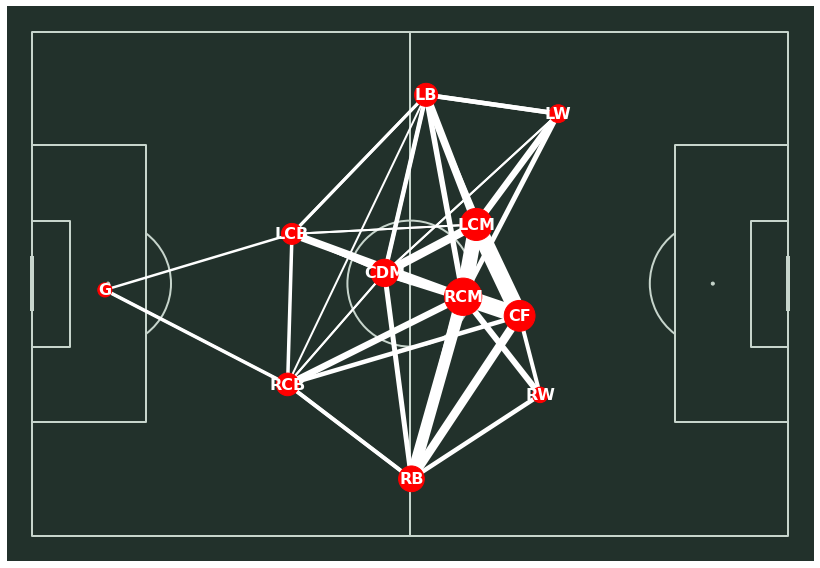

In [704]:
# PITCH
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(13.5, 8))
pitch.lines(merge_pass_bet.startX, merge_pass_bet.startY, merge_pass_bet.X, merge_pass_bet.Y, ax=ax, color='white',
           lw = merge_pass_bet.pass_outcome/2, zorder=1)
pitch.scatter(avg_locations.X, avg_locations.Y, ax=ax, s=avg_locations.pass_by_player_count*10, color='red')
for i in range(len(avg_locations)):
    pitch.annotate(s[i], xy=(avg_locations.X[i], avg_locations.Y[i]), ax=ax, color='white', ha='center'
                  ,va='center', weight='bold', size=16)
plt.show()

In [456]:
pass_between = pass_between.merge(pass_end_loc, left_on='pass_recipient', right_on='pass_recipient')

In [457]:
pass_between

,player,pass_recipient,pass_outcome,endX,endY
0,Andrés Iniesta Luján,Daniel Alves da Silva,8,67.625000,68.125000
1,Andrés Iniesta Luján,Daniel Alves da Silva,8,78.000000,66.333333
2,Andrés Iniesta Luján,Daniel Alves da Silva,8,63.000000,63.000000
3,Andrés Iniesta Luján,Daniel Alves da Silva,8,61.875000,73.625000
4,Andrés Iniesta Luján,Daniel Alves da Silva,8,67.181818,72.727273
...,...,...,...,...,...
763,Javier Alejandro Mascherano,Víctor Valdés Arribas,5,8.000000,36.000000
764,Xavier Hernández Creus,Víctor Valdés Arribas,1,16.000000,32.000000
765,Xavier Hernández Creus,Víctor Valdés Arribas,1,11.800000,34.800000
766,Xavier Hernández Creus,Víctor Valdés Arribas,1,14.400000,48.800000


In [437]:
pass_between.merge(avg_locations,left_on='player', right_on='player')

,player,pass_recipient,pass_outcome,endX,endY,X,Y,count
0,Andrés Iniesta Luján,Daniel Alves da Silva,8,67.625000,68.125000,70.456311,30.611650,103
1,Andrés Iniesta Luján,Daniel Alves da Silva,8,97.500000,36.500000,70.456311,30.611650,103
2,Andrés Iniesta Luján,Daniel Alves da Silva,8,70.166667,6.166667,70.456311,30.611650,103
3,Andrés Iniesta Luján,Daniel Alves da Silva,8,42.500000,28.750000,70.456311,30.611650,103
4,Andrés Iniesta Luján,Daniel Alves da Silva,8,50.333333,49.666667,70.456311,30.611650,103
...,...,...,...,...,...,...,...,...
751,Xavier Hernández Creus,Víctor Valdés Arribas,1,39.076923,59.769231,68.366906,42.086331,139
752,Xavier Hernández Creus,Víctor Valdés Arribas,1,82.833333,47.041667,68.366906,42.086331,139
753,Xavier Hernández Creus,Víctor Valdés Arribas,1,91.700000,21.300000,68.366906,42.086331,139
754,Xavier Hernández Creus,Víctor Valdés Arribas,1,62.153846,39.076923,68.366906,42.086331,139


In [394]:
avg_x, avg_y = [], []
avg_end_x, avg_end_y = [], []
p_names = []
p_id = []
for g, v in barca_start_ix_successful_passes_before_substitution.groupby('player_id'):
    p_id.append(g)
    p_names.append(v['player'][:-1].values[0])
    x,y = [], []
    end_x, end_y = [], []
    j = 0
    for i in v['location']:
        x.append(i[0])
        y.append(i[1])
        
    for j in v['pass_end_location']:
        end_x.append(j[0])
        end_y.append(j[1])
    
    avg_end_x.append(sum(end_x)/ len(v))
    avg_end_y.append(sum(end_y)/len(v))
    avg_x.append(sum(x)/len(v))
    avg_y.append(sum(y)/len(v))





In [395]:
p_id, p_names

([3958.0,
  4324.0,
  5203.0,
  5213.0,
  5216.0,
  5503.0,
  5506.0,
  12737.0,
  20131.0,
  20176.0,
  20177.0],
 ['Pedro Eliezer Rodríguez Ledesma',
  'Daniel Alves da Silva',
  'Sergio Busquets i Burgos',
  'Gerard Piqué Bernabéu',
  'Andrés Iniesta Luján',
  'Lionel Andrés Messi Cuccittini',
  'Javier Alejandro Mascherano',
  'David Villa Sánchez',
  'Xavier Hernández Creus',
  'Víctor Valdés Arribas',
  'Eric-Sylvain Bilal Abidal'])

[5216.0,
 4324.0,
 12737.0,
 20177.0,
 5213.0,
 5506.0,
 5503.0,
 3958.0,
 5203.0,
 20176.0,
 20131.0]

In [396]:
d = {}
d['player_id'] = p_id
d['X'] = avg_x
d['Y'] = avg_y
d['endX'] = avg_end_x
d['endY'] = avg_end_y
d['player'] = p_names

In [397]:
pass_network = pd.DataFrame(d)

In [398]:
pass_network

,player_id,X,Y,endX,endY,player
0,3958.0,83.468750,13.031250,73.500000,19.531250,Pedro Eliezer Rodríguez Ledesma
1,4324.0,60.166667,70.984848,61.318182,61.121212,Daniel Alves da Silva
2,5203.0,55.906667,38.306667,58.240000,38.080000,Sergio Busquets i Burgos
3,5213.0,41.204545,32.113636,47.704545,35.363636,Gerard Piqué Bernabéu
4,5216.0,70.456311,30.611650,73.067961,34.281553,Andrés Iniesta Luján
5,5503.0,77.336842,45.115789,74.115789,44.168421,Lionel Andrés Messi Cuccittini
6,5506.0,40.509804,56.000000,46.176471,48.470588,Javier Alejandro Mascherano
7,12737.0,80.583333,57.666667,77.375000,49.750000,David Villa Sánchez
8,20131.0,68.366906,42.086331,70.071942,44.057554,Xavier Hernández Creus
9,20176.0,11.500000,41.000000,30.550000,53.450000,Víctor Valdés Arribas


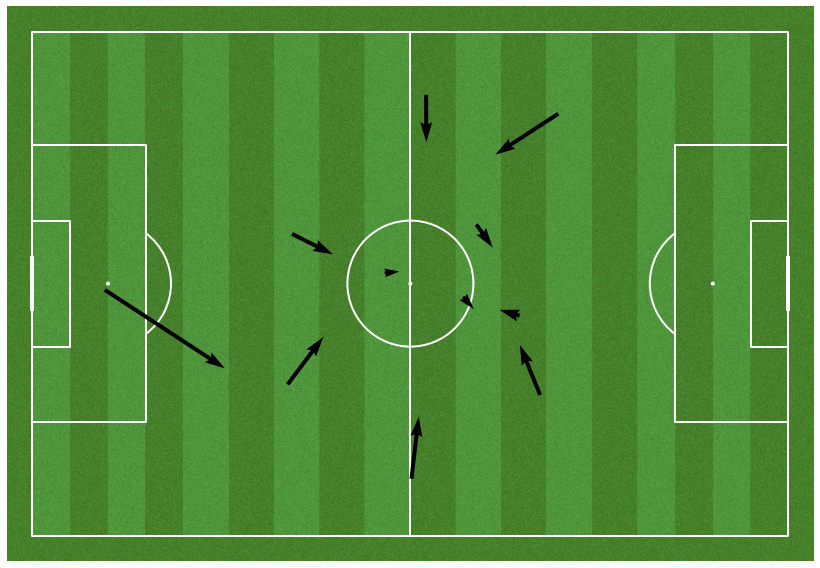

In [402]:
fig, ax = pitch.draw(figsize=(13.5, 8))
pitch.arrows(pass_network.X, pass_network.Y, pass_network.endX, pass_network.endY, ax=ax)